
INF200 Lecture No 8
===================

***Hans Ekkehard Plesser, NMBU, 1 November 2021***

# Today's topics

* Towards object-oriented programming
    * From script to class: brief recap of Lecture 7
    * Implementing all parts of C&L simulation as classes
    * Implementing varied behavior through inheritance
* Object-oriented programming
    * Fundamentals
        - Principles
        - Terminology
    * Key techniques
        - Classes and instances
        - Classes and subclasses
    * Examples
        - Combine data an operations
        - Modify behavior
        - Hide implementation details
    * Names, namespaces and scopes
    * Copying objects

-------

# Towards object-oriented programming

## Recap from Lecture 7
<img src="../l07/simple_board.png" width="60%">



### Starting point: poorly written procedural code

Shortest game duration:    3
Mean game duration    :    7.8 ± 3.4
Longest game duration :   25


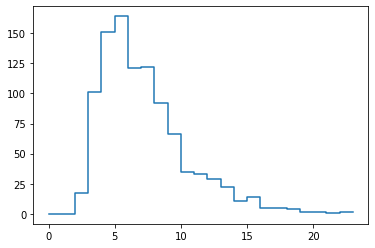

In [1]:
# %load ../l07/chutes_initial.py
import random
import matplotlib.pyplot as plt
import numpy as np

random.seed(12345679)

res = []

for _ in range(1000):
    s = 0
    p = 0
    while p < 25:
        p += random.randint(1, 6)
        if p == 1:
            p = 12
        elif p == 13:
            p = 22
        elif p == 14:
            p = 3
        elif p == 20:
            p = 8
        s += 1
    res.append(s)

print(f'Shortest game duration: {min(res):4d}')
print(f'Mean game duration    : {np.mean(res):6.1f} ± {np.std(res):.1f}')
print(f'Longest game duration : {max(res):4d}')

hv, hb = np.histogram(res, bins=np.arange(0, max(res)))
plt.step(hb[:-1], hv)
plt.show()

### First improvement: Separation of concerns

- Divide code into parts (functions) with specific tasks
- Named units make for more expressive code
- Smaller units are easier to maintain
- We can reason about and test every part separately
- Remember: We write code for humans, not for computers!
- File: [l07/chutes_functions.py](../l07/chutes_functions.py)

### Second improvement: Represent player as record

- Collect all information about a player in a record
- Fewer individual pieces of data to pass around
- Easier to add more information about a player: requires changes only in code working "inside" the record
- Allows for compact and expressive code

```python
    player = {"steps": 0, "position": 0}
    while not goal_reached(player["position"]):
        move_player(player)
    return player["steps"]
```

- File: [l07/chutes_funcs_recs.py](../l07/chutes_funcs_recs.py)

### Third improvement: Represent player as class

- Combine data (record) and operations on data (functions) into a class
- All now "in one place"
- Even more compact and expressive code

```python
    player = Player()
    while not goal_reached(player.position):
        player.move()
    return player.steps        
```

- Code using `Player` can ignore all internal details of `Player` implementation
- File: [l07/chutes_classes.py](../l07/chutes_classes.py)

### Comparison: Record-based vs class-based implementation

- `self` represents instance (essentially the dictionary or record)
- field access via `.name` instead of `["name"]`
- method (function in class) automatically gets access to `self`
- instance is created by `__init__()` when calling `Player()`

#### Record-based

```python
def move_player(player_rec):
    player_rec["position"] += random.randint(1, 6)
    player_rec["position"] = adjust_position(player_rec["position"])
    player_rec["steps"] += 1

def one_game():
    player = {"steps": 0, "position": 0}
    while not goal_reached(player["position"]):
        move_player(player)
    return player["steps"]
```

#### Class-based

```python
class Player:
    def __init__(self):
        self.position = 0
        self.steps = 0

    def move(self):
        self.position += random.randint(1, 6)
        self.position = adjust_position(self.position)
        self.steps += 1

def one_game():
    player = Player()
    while not goal_reached(player.position):
        player.move()
    return player.steps
```

### What are benefits of using a class?

- Record-based solution keeps data together, but
    - records need to be moved around
    - code handling records can be spread
    - code handling on part of the problem can be spread
- Key idea in object-oriented programming
    - Collect data describing a given part of a problem and operations on this data into one unit.
    - This unit is a *class*: A description of data *fields* and *methods* (functions) to work on them.
    - Can be thought of as "dictionary with custom functions"
        - e.g. player "dictionary" with a move function working on the dict
    - A class is a data type: it defines rules 
    - Acutal records are called *instances* (or *objects*)
- Keeping control
    - Create each instance in a consistent state
    - Each method
        - relies on instance being in a consistent state when it starts
        - guarantees that instant is in a consistent state when it finishes
    - We can check every method on its own!

---

## Implementing all parts of Chutes & Ladders as classes

- Create a class for each concept with a field for relevant data
    - Player
        - Fields (data)
            - position
            - step
        - Methods (operations)
            - move
    - Board
        - Fields
        - Methods
    - Game
        - Fields
        - Methods
    - Experiment
        - Fields
        - Methods
 - Design decision: How to we implement the relation between players and board?

- Live programming in PyCharm

---
## Implementing varied behavior

- We will live-code in PyCharm

### Multiple players

- An flexible solution for any number of players

### Different types of boards
    
- Flexible goal location
- Flexible chutes and ladders
- Board specifications from file
- Blocking goal (must hit goal exactly, else stay in place)
- Reflecting goal (move all eyes rolled, turning around at goal if necessary)

### Different types of players

- Take extra steps next time after going up a ladder
- Take fewer steps next time after going up a ladder


------

# Object-oriented programming

- Invented in the 1960s **in Norway**
- First OO language: [Simula](https://en.wikipedia.org/wiki/Simula) by [Kristen Nygaard](https://en.wikipedia.org/wiki/Kristen_Nygaard) and [Ole-Johan Dahl](https://en.wikipedia.org/wiki/Ole-Johan_Dahl)
- Important early OO-language: [Smalltalk](https://en.wikipedia.org/wiki/Smalltalk) (1972)
- First industrial-strength OO-language: [C++](https://en.wikipedia.org/wiki/C%2B%2B) by [Bjarne Stroustrup](https://en.wikipedia.org/wiki/Bjarne_Stroustrup) (1983, 1990, C++98, C++11, C++14, C++17, C++20)
- Important OO-languages today
    - General: [C++](https://en.wikipedia.org/wiki/C%2B%2B), <a href=https://en.wikipedia.org/wiki/Java_(programming_language)>Java</a>, 
<a href=https://en.wikipedia.org/wiki/Python_(programming_language)>Python</a>    
    - Mostly for web: [PHP](https://en.wikipedia.org/wiki/PHP), [JavaScript](https://en.wikipedia.org/wiki/JavaScript), 
    <a href=https://en.wikipedia.org/wiki/Ruby_(programming_language)>Ruby</a>
    - Vendor specific: 
    <a href=https://en.wikipedia.org/wiki/C_Sharp_(programming_language)>C#</a>,
[Objective-C](https://en.wikipedia.org/wiki/Objective-C), <a href=https://en.wikipedia.org/wiki/Swift_(programming_language)>Swift</a>
    - and more 
- Most of these languages are multi-paradigm languages supporting also other programming styles than strict object-oriented programming
- Other [programming paradigms](https://en.wikipedia.org/wiki/Programming_paradigm) include, e.g. 
    - procedural
    - functional
    - generic

    
##  Fundamentals

### Idea 1: Combine data and operations into new data types

- A (user-defined) data type is a *class*
- Each *object* is an *instance* of a class
- Classes and objects have *attributes*
    - *Methods* are functions operation on objects
    - *Fields* are data (variables) contained in objects
    - Methods and fields are also known as *member functions* and *member variables*
    
### Idea 2: Allow modification and extension of data types

- *Inheritance*: Define a *subclass* based on a *superclass* and adapt or extend it

### Idea 3: Expose an interface, hide the implementation

- *Interface*: Methods "advertised" for public use
    - Provide access to functionality of the class
    - Should be stable over time
    - Should be well documented
    - Should be well tested
- *Implementation*: Does the actual work
    - User should not need to know about it
    - Can change at any time (refactoring)
    - Changes should not affect behavior
- Also know as *encapsulation*

### Terminology

#### Data type
A set of rules specifying
- how to interpret chunks of data (bits and bytes) in computer memory
- what operations are permitted on this data (syntax/grammar)
- what these operations do (semantics/meaning)

#### Object
A chunk of data at a given address in computer memory with a data type. An object can be created, destroyed, and possibly modified.

#### Class
A class is a (user-defined) data type. The class definition specifies
- which data an object of the class contains
- which operations may be performed on objects of the class

#### Instance
An instance of a class is an object that has the class as its data type.

#### Method (member function)
Functions defined in a class which operate on objects of the class are *methods* of the class.

#### Data attribute (member variable, data member, field)
Variables that are part of instances of a class, i.e., which contain the data in an object, are calles *data attributes*.

#### Inheritance
Create specialized classes from general ones

#### Encapsulation
Hide implementation details from the outside world

----
## Key techniques

### Classes and instances

#### Defining a class

```python
class ClassName:
    """
    Class documentation.
    """
    
    def __init__(self, <constructor arguments>):
        """
        Documentation of constructor arguments.
        """
        # constructor body
        
    # class body
 ```

- Defines new class as data type
- Class names begin with capital letter and use camel-casing
- The new class is itself an object of data type `type`

#### Creating an instance
```python
obj = ClassName(<constructor arguments>)
```

- Create one instance (object) of class, initializing data members according to arguments

#### Destroying an instance
Handled automatically by Python's garbage collection mechanism when no references left.

#### The *constructor*: `__init__()`

- The name `__init__` has a special meaning in Python (also other `__...__` names in Python)
- `__init__(self, ...)` method is the *constructor*
    - Is called automatically by Python every time we create a class instance
    - Initializes data members of each class instance
    - In that way, someone reading the code will know from the constructor which data members to expect
    - Initialize members with `None`, empty lists or similar to ensure initial state is self-consistent
- Constructor should refuse to construct instances with meaningless values, e.g., a circle with negative radius

**Overall idea: Construct objects with consistent state and guarantee that all methods maintain objects in a consistent state.**    


#### Docstrings

- Class docstring: describe purpose of class itself
- Constructor docstring: describe arguments
- Help functions will typically display constructor doc together with class doc

---------
### Example: Circles and rectangles

In [2]:
import math

In [3]:
class Circle:
    """Circle shape."""
    
    def __init__(self, center, radius):
        """
        center: co-coordinates of circle center
        radius: radius of circle (>= 0 required)
        """
        
        assert radius >= 0, "Radius must be strictly positive"
        self.ctr = center
        self.rad = radius
        
    def area(self):
        """Area of circle."""
        return math.pi * self.rad**2

In [4]:
class Rectangle:
    def __init__(self, lower_left, upper_right):
        self.ll = lower_left
        self.ur = upper_right
        
    def area(self):
        return (self.ur[0] - self.ll[0]) * (self.ur[1] - self.ll[1])

In [5]:
type(Circle)

type

In [6]:
type(Rectangle)

type

In [7]:
Circle?

Init signature: Circle(center, radius)
Docstring:      Circle shape.
Init docstring:
center: co-coordinates of circle center
radius: radius of circle (>= 0 required)
Type:           type
Subclasses:     


- We create two instances and look at their type an id

In [8]:
c1 = Circle((0, 0), 10)
c2 = Circle((0, 0), 20)
print(c1, type(c1), hex(id(c1)))
print(c2, type(c2), hex(id(c2)))

<__main__.Circle object at 0x7f921991ca00> <class '__main__.Circle'> 0x7f921991ca00
<__main__.Circle object at 0x7f921991c9a0> <class '__main__.Circle'> 0x7f921991c9a0


- We can query the area of the circles

In [9]:
c1.area(), c2.area()

(314.1592653589793, 1256.6370614359173)

- We cannot create circles with "illegal" specs"
- What would happen if we did not have the protection in place?

In [10]:
Circle((1, 0), -1)

AssertionError: Radius must be strictly positive

- We can combine circles and rectangles in a list and work with them

In [11]:
shapes = [Circle((0, 0), 10), Circle((1, 1), 5), Rectangle((0.5, 0.5), (3, 2))]
for shape in shapes:
    print(shape.area())

314.1592653589793
78.53981633974483
3.75


#### Compare to procedural code

In [12]:
def circle_area(radius):
    return math.pi * radius ** 2

def rectangle_area(lower_left, upper_right):
    return (upper_right[0] - lower_left[0]) * (upper_right[1] - lower_left[1])

shapes = [{'form': 'circle', 'center': (0, 0), 'radius': 10},
          {'form': 'circle', 'center': (1, 1), 'radius': 5},
          {'form': 'rectangle', 'lower_left': (0.5, 0.5), 'upper_right': (3, 2)}]

for shape in shapes:
    if shape['form'] == 'circle':
        area = circle_area(shape['radius'])
    elif shape['form'] == 'rectangle':
        area = rectangle_area(shape['lower_left'], shape['upper_right'])
    else:
        raise ValueError('Unknown geometrical form.')
    print(area)

314.1592653589793
78.53981633974483
3.75


- Does the same thing
- Code is more complex
- Difficult to maintain for more shapes and more operations

### Example: Expose interface, hide implementation

- Different implementation of `Rectangle` with same behavior

In [13]:
class Rectangle:
    def __init__(self, lower_left, upper_right):
        self.width = upper_right[0] - lower_left[0]
        self.height = upper_right[1] - lower_left[1]
        
    def area(self):
        return self.width * self.height

In [14]:
shapes = [Circle((0, 0), 10), Circle((1, 1), 5), Rectangle((0.5, 0.5), (3, 2))]
for shape in shapes:
    print(shape.area())

314.1592653589793
78.53981633974483
3.75


- Same interface
    - Same member functions
    - Member functions take same arguments 
    - Member functions behave the same
- Different implementation
    - width and height vs corner coordinates
    
### "Hiding" internal attributes

- Code using our class should only use the *interface*
- We should attempt to change interface as little as possible
- Need to tell class users what is interface, what implementation
- Many OO languages (C++, Java, ...) have
    - *private* members
        - only accessible from methods of the class
        - strictly enforced by compiler
- Python
    - no enforced privacy
    - convention: member names beginning with `_` indicate implementation details
    - are accessible, but class user has been warned
    - "`_abc` may disappear or change its meaning at any time, snoop around at your own risk"
    
#### Rectangle class with "hidden" details

In [15]:
class Rectangle:
    def __init__(self, lower_left, upper_right):
        self._width = upper_right[0] - lower_left[0]
        self._height = upper_right[1] - lower_left[1]
        
    def area(self):
        return self._width * self._height

- Deciding what is interface and what is implementation detail is an important design decision
- Depends on the problem we want to solve with our program
- Guiding questions: 
    - Will the user of our program know about or care about this information?
    - Is the data related to the actual problem at hand?

----------

## Inheritance (subclassing)

- Define a class covering the general case
- Specialize into subclasses for specific cases
- Essential in languages such as C++ and Java
    - Containers such as lists, arrays, etc can only contain pointers to objects derived from the same base class
- Useful in Python

### Example: Modifying and extending a data type

#### Base class

In [16]:
class Member:
    def __init__(self, name, number):
        self.name = name
        self.number = number
    
    def display(self):
        print('Member: {0.name} (#{0.number})'.format(self))        

#### Subclass

In [17]:
class Officer(Member):
    def __init__(self, name, number, rank):
        super().__init__(name, number)
        self.rank = rank

    def display(self):
        print('{0.rank}: {0.name} (#{0.number})'.format(self))

In [18]:
club = [Officer('Joe', 1, 'President'),
        Officer('Jane', 2, 'Treasurer'),
        Member('Jack', 3,)]
for person in club:
    person.display()

President: Joe (#1)
Treasurer: Jane (#2)
Member: Jack (#3)


[Code on Pythontutor](http://www.pythontutor.com/visualize.html#code=class%20Member%3A%0A%20%20%20%20def%20__init__%28self,%20name,%20number%29%3A%0A%20%20%20%20%20%20%20%20self.name%20%3D%20name%0A%20%20%20%20%20%20%20%20self.number%20%3D%20number%0A%20%20%20%20%0A%20%20%20%20def%20display%28self%29%3A%0A%20%20%20%20%20%20%20%20print%28'Member%3A%20%7B0.name%7D%20%28%23%7B0.number%7D%29'.format%28self%29%29%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%0Aclass%20Officer%28Member%29%3A%0A%20%20%20%20def%20__init__%28self,%20name,%20number,%20rank%29%3A%0A%20%20%20%20%20%20%20%20super%28%29.__init__%28name,%20number%29%0A%20%20%20%20%20%20%20%20self.rank%20%3D%20rank%0A%0A%20%20%20%20def%20display%28self%29%3A%0A%20%20%20%20%20%20%20%20print%28'%7B0.rank%7D%3A%20%7B0.name%7D%20%28%23%7B0.number%7D%29'.format%28self%29%29%0A%0Aclub%20%3D%20%5BOfficer%28'Joe',%201,%20'President'%29,%0A%20%20%20%20%20%20%20%20Officer%28'Jane',%202,%20'Treasurer'%29,%0A%20%20%20%20%20%20%20%20Member%28'Jack',%203,%29%5D%0Afor%20person%20in%20club%3A%0A%20%20%20%20person.display%28%29%0A%20%20%20%20&cumulative=false&curInstr=0&heapPrimitives=false&mode=display&origin=opt-frontend.js&py=3&rawInputLstJSON=%5B%5D&textReferences=false)

### Terminology

#### Inheritance (Subclassing)

Creating a new class based on an existing class. The new class (subclass, derived class, daughter class) inherits the attributes of the existing class (superclass, base class, mother class).

Inheritance typically reflects an *is-a*  relationship, while *has-a* relationships are expressed using attributes:
- a tiger *is a* mammal
- a friend *has a* name

#### Defining subclasses

```python
class SubClassName(SuperClass):
    """Subclass documentation."""
    
    # body
```

#### Subclass instantiation

```python
obj = SubClassName()
```

- All methods defined in the superclass are available in the subclass
- The subclass can redefine any inherited method
- The subclass can define new methods and add new attributes

### Constructors for subclasses

- Subclass constructor must initialize the attributes of the superclass
- Most easily done by calling constructor of the superclass
- Function `super()` provides access to superclass

In [19]:
class Officer(Member):
    def __init__(self, name, number, rank):
        super().__init__(name, number)
        self.rank = rank

    def display(self):
        print('{0.rank}: {0.name} (#{0.number})'.format(self))

### Subclasses of subclasses of ...

- We can derive subclasses of any class
- In principle, arbitrarily deep class hierarchies possible
- In practice, keep hierarchies shallow!
- All classes derive from built-in class `object` in the end
- `__base__` attribute shows base class

In [20]:
print(Member.__base__)

<class 'object'>


In [21]:
print(Officer.__base__)

<class '__main__.Member'>


In [22]:
print(object.__base__)

None


- `object` has no base class, it is the root of the class hierarchy.

#### Who gets called when?—Method resolution order

Define three classes `A > B > C` where each subclass redefines one method.

In [23]:
class A:
    def f(self): return 'A.f()'
    def g(self): return 'A.g()'
    def h(self): return 'A.h()'
    
class B(A):
    def f(self): return 'B.f()'

class C(B):
    def g(self): return 'C.g()'

[Code on Pythontutor](http://www.pythontutor.com/visualize.html#code=class%20A%3A%0A%20%20%20%20def%20f%28self%29%3A%20return%20'A.f%28%29'%0A%20%20%20%20def%20g%28self%29%3A%20return%20'A.g%28%29'%0A%20%20%20%20def%20h%28self%29%3A%20return%20'A.h%28%29'%0A%20%20%20%20%0Aclass%20B%28A%29%3A%0A%20%20%20%20def%20f%28self%29%3A%20return%20'B.f%28%29'%0A%0Aclass%20C%28B%29%3A%0A%20%20%20%20def%20g%28self%29%3A%20return%20'C.g%28%29'%0A%20%20%20%20%0Aa%20%3D%20A%28%29%0Ab%20%3D%20B%28%29%0Ac%20%3D%20C%28%29%0A%0Aprint%28a.f%28%29,%20a.g%28%29,%20a.h%28%29%29%0Aprint%28b.f%28%29,%20b.g%28%29,%20b.h%28%29%29%0Aprint%28c.f%28%29,%20c.g%28%29,%20c.h%28%29%29&cumulative=false&curInstr=0&heapPrimitives=false&mode=display&origin=opt-frontend.js&py=3&rawInputLstJSON=%5B%5D&textReferences=false)

Create one instance per class.

In [24]:
a = A()
b = B()
c = C()

Call methods on `A` instance

In [25]:
print(a.f(), a.g(), a.h())

A.f() A.g() A.h()


Call methods on `B` instance

In [26]:
print(b.f(), b.g(), b.h())

B.f() A.g() A.h()


Call methods on `C` instance

In [27]:
print(c.f(), c.g(), c.h())

B.f() C.g() A.h()


- Methods are looked up from bottom and up
    1. instance
    1. class
    1. superclasses in ascending order
    1. `object`
- Lookup order is available as attribute `__mro__` (method resolution order)

In [28]:
A.__mro__

(__main__.A, object)

In [29]:
B.__mro__

(__main__.B, __main__.A, object)

In [30]:
C.__mro__

(__main__.C, __main__.B, __main__.A, object)

------------------------------------------

## Names, Namespaces, and Scopes

### Why worry about names?

1. Programs execute functions to manipulate data.
1. Data and functions are stored as sequences of bits in memory.
1. We need *names* to refer to data and functions in our programs.
1. In large programs
    - the same name may be used or different purposes in different places
    - it is impossible to keep an overview over all names
    - E.g.: what do you get if you run `from xyz import *`?
1. Solution: *namespaces* and *scoping rules*

#### Namespaces (navnerom)
Namespaces help to keep names organized.

#### Scoping rules (regler for gyldighetsområder)
Scoping rules define which namespace applies in each part of a program.

### How do we bind names to objects in Python?

Operation  |  Example  | Name bound
:- | :- | -
Assignment | `x = 2`| `x`
Function definition | `def f(): pass` | `f`
Class definition | `class A: pass`  | `A`
Module import | `import math` | `math`
 | `import math as m` | `m` 
 | `from math import sin` | `sin` 

[Code on Pythontutor](http://www.pythontutor.com/visualize.html#code=x%20%3D%202%0A%0Adef%20f%28%29%3A%0A%20%20%20%20pass%0A%0Aclass%20A%3A%0A%20%20%20%20pass%0A%0Aimport%20math%0Aimport%20math%20as%20m%0Afrom%20math%20import%20sin%0A&cumulative=false&curInstr=0&heapPrimitives=false&mode=display&origin=opt-frontend.js&py=3&rawInputLstJSON=%5B%5D&textReferences=false)

#### Definitions are statements

Definitions are statements in Python programs. They are executed just as all other statements.

### Where are names bound?

<img src="L06_NamesBound.png" width="60%">

[Code on Pythontutor](http://www.pythontutor.com/visualize.html#code=class%20Friend%3A%0A%20%20%20%20%0A%20%20%20%20greeting%20%3D%20'Hi,%20'%0A%20%20%20%20%0A%20%20%20%20def%20__init__%28self,%20name%29%3A%0A%20%20%20%20%20%20%20%20self.name%20%3D%20name%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20def%20greet%28self%29%3A%0A%20%20%20%20%20%20%20%20text%20%3D%20Friend.greeting%20%2B%20self.name%0A%20%20%20%20%20%20%20%20print%28text%29%0A%20%20%20%20%20%20%20%20%0Ajoe%20%3D%20Friend%28'Joe'%29%0Ajoe.greet%28%29%0A&cumulative=false&curInstr=0&heapPrimitives=false&mode=display&origin=opt-frontend.js&py=3&rawInputLstJSON=%5B%5D&textReferences=false)

### Name-binding rules

- When a name is bound, it is registered in *exactly one namespace*
- Available namespaces
    - `__builtin__` namespace of Python interepreter
    - each module has a namespace (each imported `*.py` file)
    - each class has a namespace
    - each class *instance* has a namespace
    - each function *invocation* has a namespace
- In which namespace is a name registered?
    - In the namespace of the *innermost scope*
    - Inside a list comprehension: in the comprehension's namespace (Python 3)
    - Inside function definitions: in the function invocation's namespace
    - Inside class definitions: in the class' namespace
    - Otherwise, in the module's namespace
- Example of name binding in recursive function calls: 
[Code on Pythontutor](http://pythontutor.com/visualize.html#code=def%20factorial%28n%29%3A%0A%20%20%20%20if%20n%20%3C%3D%201%3A%0A%20%20%20%20%20%20%20%20res%20%3D%201%0A%20%20%20%20else%3A%0A%20%20%20%20%20%20%20%20res%20%3D%20n%20*%20factorial%28n-1%29%0A%20%20%20%20return%20res%0A%20%20%20%20%20%20%20%20%0Aprint%28factorial%283%29%29%0A&cumulative=false&curInstr=0&heapPrimitives=false&mode=display&origin=opt-frontend.js&py=3&rawInputLstJSON=%5B%5D&textReferences=false)

### Where are names looked up?

<img src="L06_NamesLookup.png" width="60%">

### Name-lookup rules

- When we use a name, Python must loop up the name and find the object it refers to
- In which namespace does Python look?
- **LEGB rule** (Mark Lutz, *Learning Python*)
    - **L—Local:** Namespace of the function invocation currently executing
    - **E—Enclosing:** Namespaces of all functions enclosing the definition of the current function (ignore for now)
    - **G—Global:** Namespace of module in which the current function *was defined*
    - **B—Builtin:** Namespace of Python builtins
- Exceptions can be forced with `global` and `nonlocal` keywords (avoid for now)

### Attribute lookup with "dot"

- Modules, classes, and instances have attributes
- Attribute names are bound inside module, class, instancance namespace
- Accessible through the dot-operator:

In [33]:
class Friend:
    
    greeting = 'Hi, '
    
    def __init__(self, name):
        self.name = name
        
    def greet(self):
        text = Friend.greeting + self.name
        print(text)
        
joe = Friend('Joe')
print(joe.name)

Joe


In [34]:
joe.name = 'Joe Doe'
joe.greet()

Hi, Joe Doe


In [35]:
Friend.greeting = 'Hello, '
joe.greet()

Hello, Joe Doe


### Attribute lookup in instances vs classes

<img src="L06_NamesInstanceClass.png" width="45%">

### Pitfall: Duplicate attribute names

- Python uses the same namespace for methods and data attributes
- Names are looked up in the instance namespace first, then in the class namespace
- This may lead to surprises when using the same name in multiple places

In [36]:
class Friend:
    def __init__(self, name):
        self.name = name
    def greet(self):
        print('Hi,', self.name)
    def name(self):
        print('Your name is', self.name)

In [37]:
joe = Friend('Joe')
joe.greet()

Hi, Joe


In [38]:
joe.name()

TypeError: 'str' object is not callable

[Code on Pythontutor](http://www.pythontutor.com/visualize.html#code=class%20Friend%3A%0A%20%20%20%20def%20__init__%28self,%20name%29%3A%0A%20%20%20%20%20%20%20%20self.name%20%3D%20name%0A%20%20%20%20def%20greet%28self%29%3A%0A%20%20%20%20%20%20%20%20print%28'Hi,',%20self.name%29%0A%20%20%20%20def%20name%28self%29%3A%0A%20%20%20%20%20%20%20%20print%28'Your%20name%20is',%20self.name%29%0A%20%20%20%20%20%20%20%20%0Ajoe%20%3D%20Friend%28'Joe'%29%0Ajoe.greet%28%29%0Ajoe.name%28%29&cumulative=false&curInstr=0&heapPrimitives=false&mode=display&origin=opt-frontend.js&py=3&rawInputLstJSON=%5B%5D&textReferences=false)

------

## Copying objects

### Assignment only adds new name to existing object

In [39]:
class A:
    pass
a = A()
a.x = 10
b = a
b.x = 20
print(a.x, b.x)

20 20


- `a` and `b` are two names for the same object
- [Code on PythonTutor](http://www.pythontutor.com/visualize.html#code=class%20A%3A%0A%20%20%20%20pass%0Aa%20%3D%20A%28%29%0Aa.x%20%3D%2010%0Ab%20%3D%20a%0Ab.x%20%3D%2020%0Aprint%28a.x,%20b.x%29%0A&cumulative=false&curInstr=0&heapPrimitives=false&mode=display&origin=opt-frontend.js&py=3&rawInputLstJSON=%5B%5D&textReferences=false)

### The Python `copy` module

- `copy` provides functions for copying objects
- [Code on PythonTutor](http://www.pythontutor.com/visualize.html#code=import%20copy%0Aclass%20A%3A%0A%20%20%20%20pass%0Aa%20%3D%20A%28%29%0Aa.x%20%3D%2010%0Ab%20%3D%20a%0Ab.x%20%3D%2020%0Ac%20%3D%20copy.copy%28a%29%0Ac.x%20%3D%2050%0Aprint%28a.x,%20b.x,%20c.x%29%0A&cumulative=false&curInstr=0&heapPrimitives=false&mode=display&origin=opt-frontend.js&py=3&rawInputLstJSON=%5B%5D&textReferences=false)

In [40]:
import copy
c = copy.copy(a)
c.x = 50
print(a.x, b.x, c.x)

20 20 50


#### Copying: Details

In [41]:
class S:
    pass

s = S()
s.m = 'Nice weather today.'
t = copy.copy(s)
print(id(s), id(t))
print(id(s.m), id(t.m))

140265444103312 140265472291696
140265471717664 140265471717664


- `s` and `t` have *different* `id()`: they are *different `S` instances*
- `s.m` and `t.m` have the same `id()`: they are the *same string instance*
- `copy.copy()` is a *shallow copy*: `t` is a new instance with its own namespace, but the names refer to the same objects as in `s`
- Assignment to a member re-binds the name to a new string object

In [42]:
t.m = 'The forecast for tomorrow is also nice.'
print(id(s), id(t))
print(id(s.m), id(t.m))

140265444103312 140265472291696
140265471717664 140265470929968


- [Explore on PythonTutor](http://www.pythontutor.com/visualize.html#code=import%20copy%0Aclass%20S%28object%29%3A%0A%20%20%20%20pass%0A%0As%20%3D%20S%28%29%0As.m%20%3D%20'Nice%20weather%20today.'%0At%20%3D%20copy.copy%28s%29%0At.m%20%3D%20'The%20forecast%20for%20tomorrow%20is%20also%20nice.'%0A&cumulative=false&curInstr=0&heapPrimitives=true&mode=display&origin=opt-frontend.js&py=3&rawInputLstJSON=%5B%5D&textReferences=false)

### Copying object with mutable members: deep copy

- Mutables: lists, dictionaries, objects of most classes
- What does shallow copy mean for objects with mutable members?

In [43]:
u = S()
u.m = [1, 2, 3]
v = copy.copy(u)
u.m.append(4)
print(u.m, v.m)
print (id(u.m), id(v.m))

[1, 2, 3, 4] [1, 2, 3, 4]
140265470853888 140265470853888


- Lists are changed in *both* `u` and `v` because their `m` refers to the same list object
- Solution: *deep copy*

In [44]:
w = copy.deepcopy(u)
print(u.m, v.m, w.m)
print (id(u.m), id(v.m), id(w.m))

[1, 2, 3, 4] [1, 2, 3, 4] [1, 2, 3, 4]
140265470853888 140265470853888 140265469569600


- Note that `w.m` has a different `id`

In [45]:
w.m.append(5)
print(u.m, v.m, w.m)

[1, 2, 3, 4] [1, 2, 3, 4] [1, 2, 3, 4, 5]


- Since `w.m` is a different list instance, `u.m` and `v.m` are not changed
- `copy.deepcopy()` also works for classes we write ourselves

In [46]:
class V:
    def __init__(self, x, y):
        self.x, self.y = x, y
        
class C:
    def __init__(self, ctr, r):
        self.ctr, self.r = ctr, r
        
b = C(V(0, 0), 1)
c = copy.copy(b)
d = copy.deepcopy(b)

c.ctr.x = 10
d.ctr.x = 20

print(b.ctr.x, c.ctr.x, d.ctr.x)

10 10 20


**Forgetting the difference between shallow and deep copy is a common source of errors in Python programs!**